In [1]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



### **Visualizacion de Datos**

### **M0**

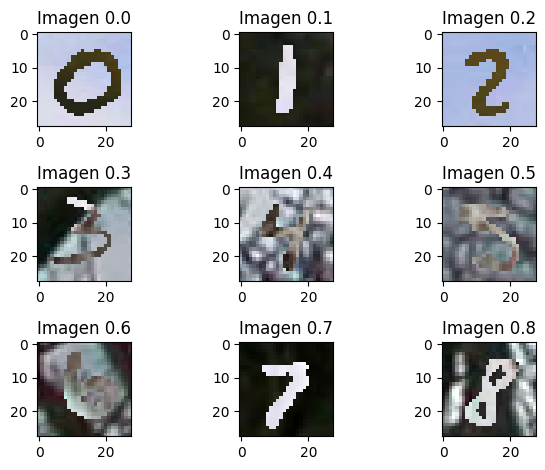

In [7]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m0/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M1**

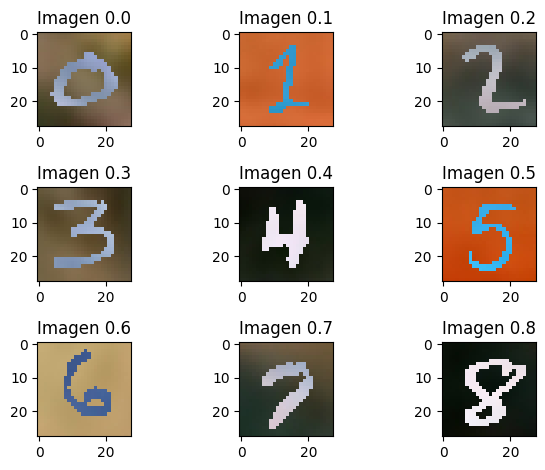

In [8]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m1/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M2**

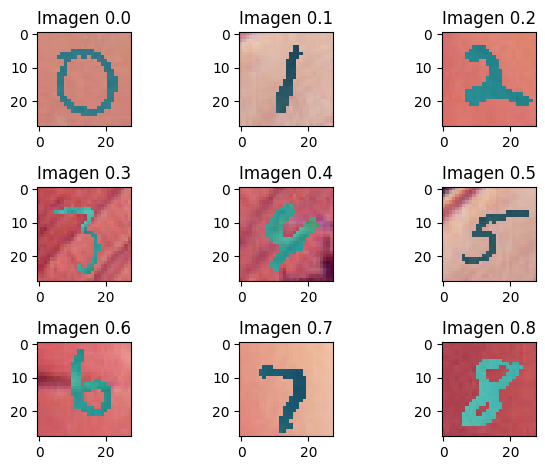

In [9]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m2/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **Divison Testing y Train**

In [ ]:
"""
import os
import shutil

origen_train = "./MMNIST/test"
destino_train = "./MMNIST_reorganizado/test"

# Crear carpetas destino 0–9
for i in range(10):
    os.makedirs(os.path.join(destino_train, str(i)), exist_ok=True)

# Recorre m0, m1, m2
for carpeta_estilo in os.listdir(origen_train):
    ruta_estilo = os.path.join(origen_train, carpeta_estilo)
    if os.path.isdir(ruta_estilo):
        for archivo in os.listdir(ruta_estilo):
            if archivo.endswith(".png"):
                try:
                    # Extraer la clase desde el nombre: parte después del punto
                    clase = int(archivo.split(".")[1])  # ej: "2.7.png" → clase = 7
                    origen = os.path.join(ruta_estilo, archivo)
                    destino = os.path.join(destino_train, str(clase), f"{carpeta_estilo}_{archivo}")
                    shutil.copy(origen, destino)
                except (IndexError, ValueError):
                    print(f"Nombre inválido: {archivo}")
"""

### **Cargar Imagenes por lote**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './MMNIST_reorganizado/train',
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    shuffle=True  # Muy importante
)

test_generator = test_datagen.flow_from_directory(
    './MMNIST_reorganizado/test',
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical'
)


Found 180000 images belonging to 10 classes.
Found 30000 images belonging to 10 classes.


In [13]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:

history = model.fit(
    train_generator,
    epochs=10,                   
    validation_data=test_generator
)


Epoch 1/10


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 117s 83ms/step - accuracy: 0.7799 - loss: 0.6834 - val_accuracy: 0.9591 - val_loss: 0.1297
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9628 - loss: 0.1217 - val_accuracy: 0.9687 - val_loss: 0.1006
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9729 - loss: 0.0857 - val_accuracy: 0.9730 - val_loss: 0.0865
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9781 - loss: 0.0692 - val_accuracy: 0.9729 - val_loss: 0.0844
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.9836 - loss: 0.0518 - val_accuracy: 0.9754 - val_loss: 0.0793
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - accuracy: 0.9868 - loss: 0.0422 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.9894 - loss: 0.0324 - val_accuracy: 0.9779 - val_loss: 0.0770
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9918 - loss: 0.0

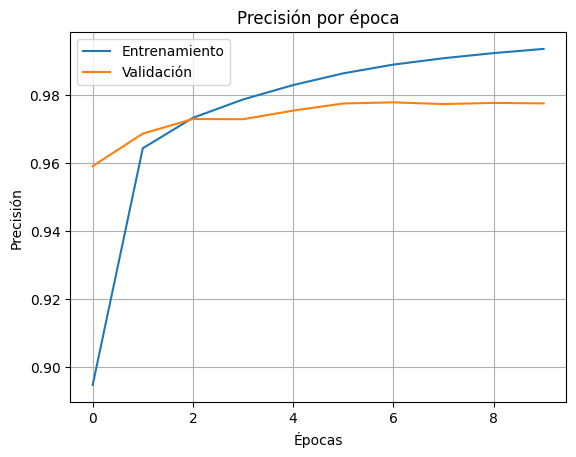

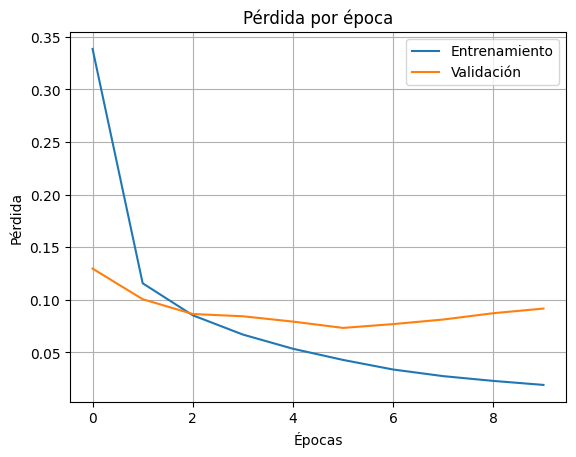

In [15]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
model.save("modelos/modeloCNN.keras")

In [18]:
print(train_generator.class_indices)  # Ver nombres
print(train_generator.classes[:20])   # Ver primeras etiquetas


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
loss, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('> %.3f' % (acc * 100.0))  # Muestra*


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9767 - loss: 0.0936
> 97.757


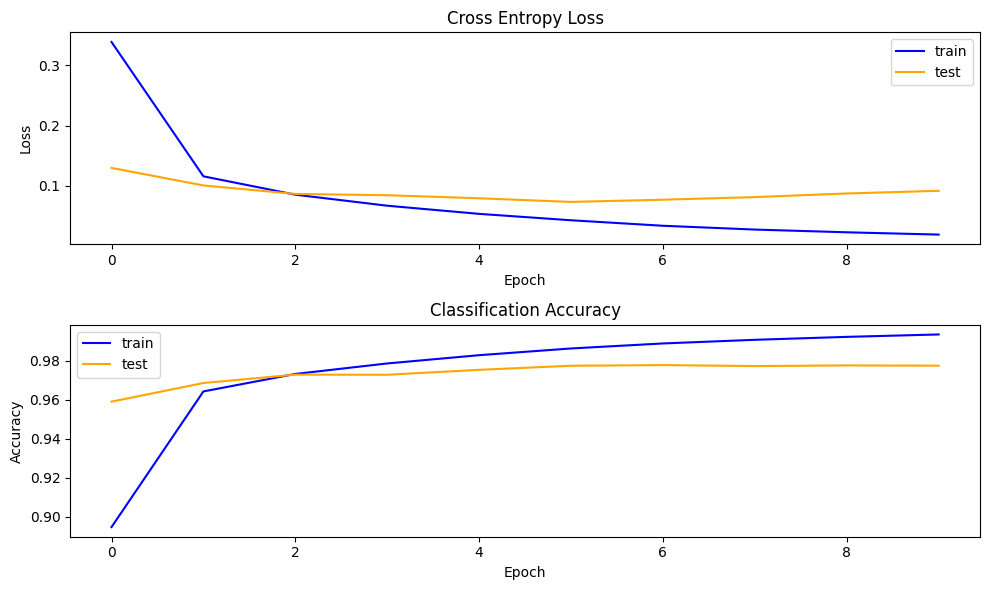

In [23]:
import matplotlib.pyplot as plt

# Crear figura con 2 subplots verticales
plt.figure(figsize=(10, 6))

# === Subplot 1: Cross Entropy Loss ===
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# === Subplot 2: Classification Accuracy ===
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dimensiones esperadas de las imágenes
img_height = 28
img_width = 28
batch_size = 32

# Generador de imágenes con normalización (escalado de píxeles 0-1)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generador para entrenamiento (80%)
train_generator = train_datagen.flow_from_directory(
    'D:/Documentos/Octavo Semestre/Data/lab3_datascience/PolyMNIST/MMNIST/train',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generador para validación (20%)
val_generator = train_datagen.flow_from_directory(
    'D:/Documentos/Octavo Semestre/Data/lab3_datascience/PolyMNIST/MMNIST/train',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/f

Found 240000 images belonging to 5 classes.
Found 60000 images belonging to 5 classes.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

img_height = 28
img_width = 28
batch_size = 64
data_dir = 'D:/Documentos/Octavo Semestre/Data/lab3_datascience/PolyMNIST/MMNIST/train'


In [ ]:
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32) / 255.0
    return imagen, etiqueta

train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size
).map(normalizar)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size
).map(normalizar)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(train_dataset.element_spec[1].numpy().shape) if hasattr(train_dataset.element_spec[1], "numpy") else 5 


Found 300000 files belonging to 5 classes.
Using 240000 files for training.
Found 300000 files belonging to 5 classes.
Using 60000 files for validation.


In [5]:
from tensorflow.keras import layers, models, optimizers

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


In [ ]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Pérdida en validación: {loss:.4f}, Precisión: {accuracy:.4f}")


In [ ]:
# Graficar precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.legend()
plt.title("Precisión por época")
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.legend()
plt.title("Pérdida por época")
plt.grid()
plt.show()


In [1]:
import tensorflow as tf
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Parámetros
img_height = 28
img_width = 28
batch_size = 64
data_dir = 'D:/Documentos/Octavo Semestre/Data/lab3_datascience/PolyMNIST/MMNIST/train'

# Función para normalizar
def normalizar(img, label):
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

# Datasets de entrenamiento y validación
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size
).map(normalizar)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size
).map(normalizar)


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/f

Found 300000 files belonging to 5 classes.
Using 240000 files for training.
Found 300000 files belonging to 5 classes.
Using 60000 files for validation.


In [ ]:
def dataset_to_numpy(dataset):
    X, y = [], []
    for batch_images, batch_labels in dataset:
        X.append(batch_images.numpy())
        y.append(batch_labels.numpy())
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y

X_train, y_train = dataset_to_numpy(train_dataset)
X_val, y_val = dataset_to_numpy(val_dataset)

# Aplanar imágenes para usar con SVM
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))


In [ ]:
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_flat, y_train)

# Predecir y evaluar
y_pred = svm.predict(X_val_flat)
acc = accuracy_score(y_val, y_pred)

print(f"✅ Precisión del modelo SVM: {acc:.4f}")
print("\n🔍 Reporte de clasificación:\n")
print(classification_report(y_val, y_pred))


In [ ]:
# Probar otros kernels para comparar rendimiento
for kernel in ['linear', 'rbf', 'poly']:
    print(f"\n🧪 Entrenando SVM con kernel: {kernel}")
    model = SVC(kernel=kernel, C=1)
    model.fit(X_train_flat, y_train)
    preds = model.predict(X_val_flat)
    acc = accuracy_score(y_val, preds)
    print(f"Precisión: {acc:.4f}")
